In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\census_income.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data=data.drop(columns=['Workclass','Native_country'])

In [8]:
data=data.replace({'Income':{'<=50K':0,'>50K':1}},{'Sex':{'Male':0,'Female':1}})

In [9]:
data=data.replace({'Education':{'school':0,'high school':1,'higher':2,'undergrad':3,'grad':4,'doc':5}})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Fnlwgt          32560 non-null  int64 
 2   Education       32560 non-null  object
 3   Education_num   32560 non-null  int64 
 4   Marital_status  32560 non-null  object
 5   Occupation      32560 non-null  object
 6   Relationship    32560 non-null  object
 7   Race            32560 non-null  object
 8   Sex             32560 non-null  object
 9   Capital_gain    32560 non-null  int64 
 10  Capital_loss    32560 non-null  int64 
 11  Hours_per_week  32560 non-null  int64 
 12  Income          32560 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [11]:
q1=data.quantile(0.25)

In [12]:
q3=data.quantile(0.75)

In [13]:
iqr=q3-q1

In [14]:
age_high=(q3.Age+1.5*iqr.Age)
age_high

78.0

In [15]:
index=np.where(data['Age']>age_high)
index

(array([   73,   221,   429,   917,  1039,  1167,  1934,  2302,  2753,
         2890,  2905,  3210,  3337,  3536,  3776,  3962,  4069,  4108,
         4719,  4833,  5103,  5271,  5290,  5369,  5405,  5999,  6172,
         6213,  6231,  6438,  6623,  6747,  7480,  7719,  7871,  8175,
         8380,  8430,  8521,  8693,  8805,  8962,  8972,  9470, 10123,
        10209, 10544, 11098, 11237, 11511, 11531, 11730, 11995, 12450,
        12491, 12829, 12974, 13024, 13025, 13294, 13695, 13927, 14103,
        14158, 14603, 14710, 14755, 14902, 15355, 15661, 15891, 16301,
        16522, 16761, 16900, 17608, 18036, 18140, 18271, 18276, 18412,
        18559, 18724, 18831, 19044, 19171, 19179, 19211, 19488, 19494,
        19514, 19688, 19746, 19827, 20248, 20420, 20462, 20481, 20482,
        20609, 20825, 20879, 20952, 21342, 21500, 21811, 21834, 22219,
        22480, 22894, 22897, 23458, 23899, 24026, 24042, 24237, 24279,
        24394, 24559, 25162, 25302, 25396, 26011, 26241, 26730, 27794,
      

In [16]:
data=data.drop(data.index[index])
data.shape

(32417, 13)

In [17]:
data.reset_index()

,index,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,1,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,2,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,3,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,4,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32413,32556,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32414,32557,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32415,32558,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [18]:
edu_high=(q3.Education_num+1.5*iqr.Education_num)
edu_high

16.5

In [19]:
index=np.where(data['Education_num']>edu_high)
index

(array([], dtype=int64),)

In [20]:
cap_high=(q3.Capital_gain+1.5*iqr.Capital_gain)
cap_high

0.0

In [21]:
cap_low=(q1.Capital_gain-1.5*iqr.Capital_gain)
cap_low

0.0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32417 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32417 non-null  int64 
 1   Fnlwgt          32417 non-null  int64 
 2   Education       32417 non-null  object
 3   Education_num   32417 non-null  int64 
 4   Marital_status  32417 non-null  object
 5   Occupation      32417 non-null  object
 6   Relationship    32417 non-null  object
 7   Race            32417 non-null  object
 8   Sex             32417 non-null  object
 9   Capital_gain    32417 non-null  int64 
 10  Capital_loss    32417 non-null  int64 
 11  Hours_per_week  32417 non-null  int64 
 12  Income          32417 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.5+ MB


In [31]:
data.isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Relationship      0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

In [23]:
data=data.drop(columns={'Education'})

In [24]:
data=data.drop(columns={'Marital_status'})

In [25]:
data=data.drop(columns={'Occupation'})

In [26]:
data=data.drop(columns={'Race'})

In [27]:
data=data.drop(columns={'Sex'})

In [32]:
data=data.drop(columns={'Relationship'})

In [52]:
data=data.replace({'Income':{'<=50K':0,'>50K':1}})

In [53]:
x=data.drop(columns=['Income'])
y=data['Income']

In [54]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [55]:
x_scaled.shape[1]

6

In [56]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

vif

,vif,Features
0,1.021594,Age
1,1.007440,Fnlwgt
2,1.043724,Education_num
3,1.026704,Capital_gain
4,1.013498,Capital_loss
5,1.034020,Hours_per_week


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [58]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [59]:
import pickle
with open('modelForPrediction.sav','wb')as f:
    pickle.dump(log_reg,f)
    
with open('sandardscaler.sav','wb')as f:
    pickle.dump(scaler,f)

In [60]:
y_pred=log_reg.predict(x_test)

In [61]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [62]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8234423195558297

In [63]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[5918,  291],
       [1140,  756]], dtype=int64)

In [64]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [65]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8234423195558297

In [66]:
Precison=true_positive/(true_positive+false_negative)
Precison

0.8384811561348824

In [67]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.8384811561348824

In [68]:
F1_score=2*(Recall*Precison)/(Recall+Precison)
F1_score

0.8384811561348823

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv('E:\datascience\census_income.csv')

In [72]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [73]:
df.shape

(32560, 15)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
df=df.drop(['Workclass'],axis=1)

In [76]:
df=df.drop(['Occupation'],axis=1)

In [77]:
df=df.drop(['Native_country'],axis=1)

In [78]:
df=df.drop(['Education'],axis=1)

In [79]:
df=df.drop(['Marital_status'],axis=1)

In [80]:
df=df.drop(['Relationship'],axis=1)

In [81]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [82]:
df.isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

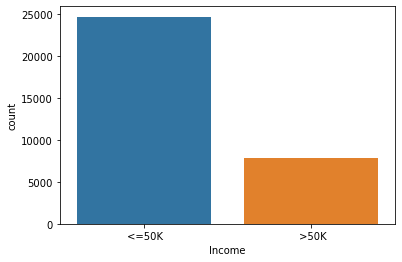

In [83]:
sns.countplot(x='Income',data=df)
plt.show()

In [84]:
from sklearn.feature_selection import SelectKBest, f_classif

In [85]:
df['Income']=df['Income'].replace({'<=50K':0,'>50K':1})

In [86]:
df['Sex']=df['Sex'].replace({'Male':0,'Female':1})

In [87]:
df['Race']=df['Race'].replace({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4})

In [95]:
x=df.drop('Income',axis=1)
y=df.Income

In [96]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

ValueError: could not convert string to float: ' White'

In [97]:
from time import time

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

NameError: name 'x_scaler' is not defined

In [99]:
knn=KNeighborsClassifier()

In [100]:
start = time()
knn.fit(x_train,y_train)
print("knn trainin Time:",(time()-start))

start=time()
y_pred=knn.predict(x_test)
print("knn test Time:",(time()-start))

knn trainin Time: 0.416764497756958
knn test Time: 0.7807044982910156


In [101]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5652,  557],
       [ 987,  909]], dtype=int64)

In [102]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      6209
        >50K       0.62      0.48      0.54      1896

    accuracy                           0.81      8105
   macro avg       0.74      0.69      0.71      8105
weighted avg       0.80      0.81      0.80      8105

